#**CCP** <br>
WILD-LIFE MONITORING SYSTEM

# DETECTING ANIMALS

## USING HAAR

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
panda_classifier = cv2.CascadeClassifier('/content/haar_cascade_xml/panda_face_cascade.xml')
dog_classifier = cv2.CascadeClassifier('/content/haar_cascade_xml/dog_classifier.xml')
cat_classifier = cv2.CascadeClassifier('/content/haar_cascade_xml/cat_classifier.xml')
lion_classifier = cv2.CascadeClassifier('/content/haar_cascade_xml/lion_classifier.xml')

In [ ]:
print(panda_classifier.empty())
print(dog_classifier.empty())
print(cat_classifier.empty())
print(lion_classifier.empty())

False
False
False
False


In [ ]:
def detect_animal(image,classifier,annot,scale_percent=50):
    if image is None:
        print('Error: Invalid image.')
        return

    # Get original image dimensions
    height, width = image.shape[:2]

    # Calculate the scaling factor
    scale_factor = scale_percent / 100.0

    # Calculate the new dimensions
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)

    # Resize image with the calculated dimensions
    resized_img = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

    # Detect panda faces
    faces = classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=2, minSize=(75, 75))

    # Draw rectangles around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(resized_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(resized_img, annot, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

    # Display the image with faces marked
    cv2_imshow(resized_img)

In [ ]:
def detect_animal_video(video_path, output_path, classifier , annot,scale=0.5):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get video properties (dimensions and frame rate)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust codec as per your system compatibility
    out = cv2.VideoWriter(output_path, fourcc, frame_rate, (frame_width, frame_height))

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            break

        # Resize frame for better viewing (optional)
        # resized_frame = cv2.resize(frame, (640, 480), interpolation=cv2.INTER_AREA)

        height, width = frame.shape[:2]

        # Calculate the new dimensions
        new_width = int(width * scale)
        new_height = int(height * scale)

        resized_frame = cv2.resize(frame, (new_width, new_height), interpolation=cv2.INTER_AREA)
        resized_frame = frame

        gray = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

        # Detect panda faces
        faces = classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=10, minSize=(75, 75))

        # Draw rectangles around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(resized_frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(resized_frame, annot , (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

        # Write the frame with faces marked to the output video
        out.write(resized_frame)

    # Release the video capture and writer objects
    cap.release()
    out.release()

    print(f"Output video saved as {output_path}")

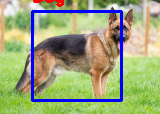

In [ ]:
test_img = cv2.imread('/content/testing/image_testing/dog.jpg')
detect_animal(test_img,dog_classifier,'Dog',scale_percent=10)

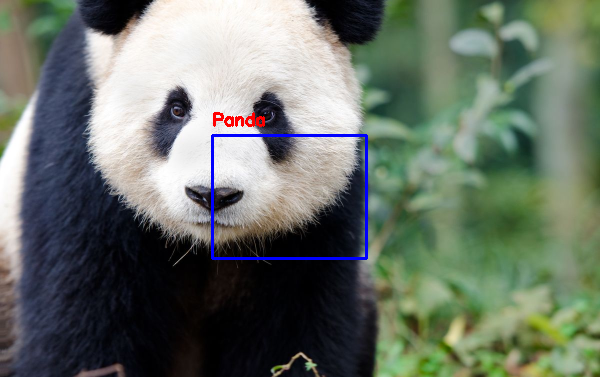

In [ ]:
test_img = cv2.imread('/content/testing/image_testing/panda_Test1.jpg')
detect_animal(test_img,panda_classifier,'Panda',scale_percent=50)

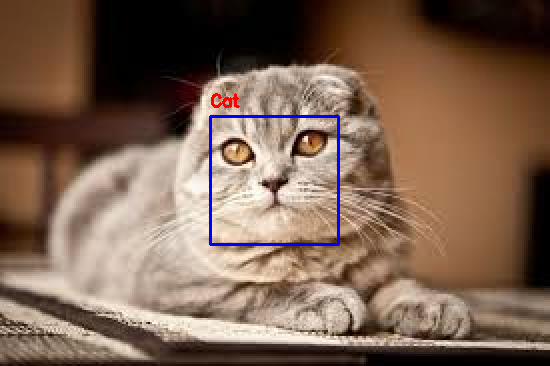

In [ ]:
test_img = cv2.imread('/content/testing/image_testing/cat.jpeg')
detect_animal(test_img,cat_classifier,'Cat',scale_percent=200) #image file is too small for haar to detect anything hence using 200%b

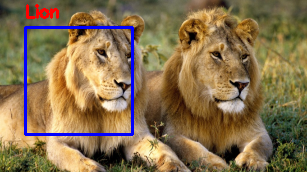

In [ ]:
test_img = cv2.imread('/content/testing/image_testing/lion.jpg')
detect_animal(test_img,cat_classifier,'Lion',scale_percent=30)

In [ ]:
video_path = '/content/testing/video_testing/dog.mp4'
output_path = '/content/testing/video_testing/output/output.mp4'

In [ ]:
detect_animal_video(video_path,output_path,dog_classifier,'DOG',scale=0.3)

KeyboardInterrupt: 

Detecting dog and cat in one video

In [ ]:
video_path = '/content/testing/video_testing/dog cat.mp4'
output_path = '/content/testing/video_testing/output/output.mp4'

In [ ]:
# Open the video file
cap = cv2.VideoCapture(video_path)
scale = 0.3
# Get video properties (dimensions and frame rate)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust codec as per your system compatibility
out = cv2.VideoWriter(output_path, fourcc, frame_rate, (frame_width, frame_height))

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Resize frame for better viewing (optional)
    # resized_frame = cv2.resize(frame, (640, 480), interpolation=cv2.INTER_AREA)

    height, width = frame.shape[:2]

    # Calculate the new dimensions
    new_width = int(width * scale)
    new_height = int(height * scale)

    resized_frame = cv2.resize(frame, (new_width, new_height), interpolation=cv2.INTER_AREA)
    resized_frame = frame

    gray = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    cat_faces = cat_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=10, minSize=(75, 75))
    dog_faces = dog_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=10, minSize=(75, 75))

    # Draw rectangles around the faces
    for (x, y, w, h) in cat_faces:
        cv2.rectangle(resized_frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(resized_frame,'Cat' , (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

    for (x, y, w, h) in dog_faces:
        cv2.rectangle(resized_frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(resized_frame,'Dog' , (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

    # Write the frame with faces marked to the output video
    out.write(resized_frame)

# Release the video capture and writer objects
cap.release()
out.release()
print(f"Output video saved as {output_path}")

Output video saved as /content/testing/video_testing/output/output.mp4


## USING YOLO

In [4]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 7.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [5]:
import os
from ultralytics import YOLO
import cv2
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [6]:
model_path = "/content/yolov8/yolov8m.pt"

In [3]:
def detect_animals_in_image(image_path, model_path, output_image_path=None, threshold=0.5):
    # Load the image
    frame = cv2.imread(image_path)
    if frame is None:
        print(f"Error: Could not read image file {image_path}")
        return

    # Load the YOLOv8 model
    model = YOLO(model_path)  # Replace with your actual model loading code

    # Perform inference on the image
    results = model(frame)[0]

    # Process each detection result
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        # Filter by threshold
        if score > threshold:
            # Draw bounding box and label on the frame
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1-10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3, cv2.LINE_AA)

    # If output image path is provided, save annotated image; otherwise, show it
    if output_image_path:
        cv2.imwrite(output_image_path, frame)
        print(f"Annotated image saved as {output_image_path}")
    else:
        cv2_imshow(frame)  # Display the annotated image using cv2_imshow



In [ ]:
def detect_animals_in_video(video_path, model_path, output_path, threshold=0.5):
  # Load YOLO
  model = YOLO(model_path)
  # Open the video file
  cap = cv2.VideoCapture(video_path)
  if not cap.isOpened():
      print(f"Error: Could not open video file {video_path}")
      return

  # Get video properties (dimensions and frame rate)
  frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

  # Define the codec and create VideoWriter object
  fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust codec as per your system compatibility
  out = cv2.VideoWriter(output_path, fourcc, frame_rate, (frame_width, frame_height))

  while True:
      # Capture frame-by-frame
      ret, frame = cap.read()
      if not ret:
          break

      # Perform object detection using the model
      results = model(frame)[0]

      # Process each detection result
      for result in results.boxes.data.tolist():
          x1, y1, x2, y2, score, class_id = result

          # Filter by threshold
          if score > threshold:
              # Draw bounding box and label on the frame
              cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
              cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                          cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

      # Write the frame with detections to the output video
      out.write(frame)

  # Release the video capture and writer objects
  cap.release()
  out.release()
  print(f"Output video saved as {output_path}")


0: 448x640 1 zebra, 952.3ms
Speed: 4.4ms preprocess, 952.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


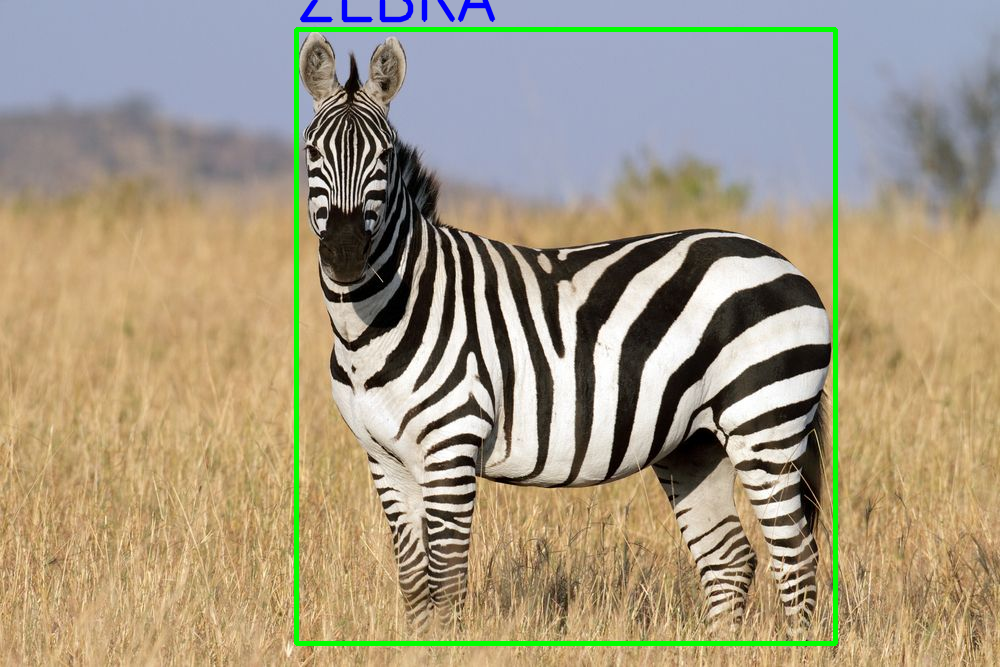

In [ ]:
detect_animals_in_image('/content/testing/image_testing/zebra.jpg',model_path)


0: 448x640 1 bear, 1050.2ms
Speed: 5.8ms preprocess, 1050.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


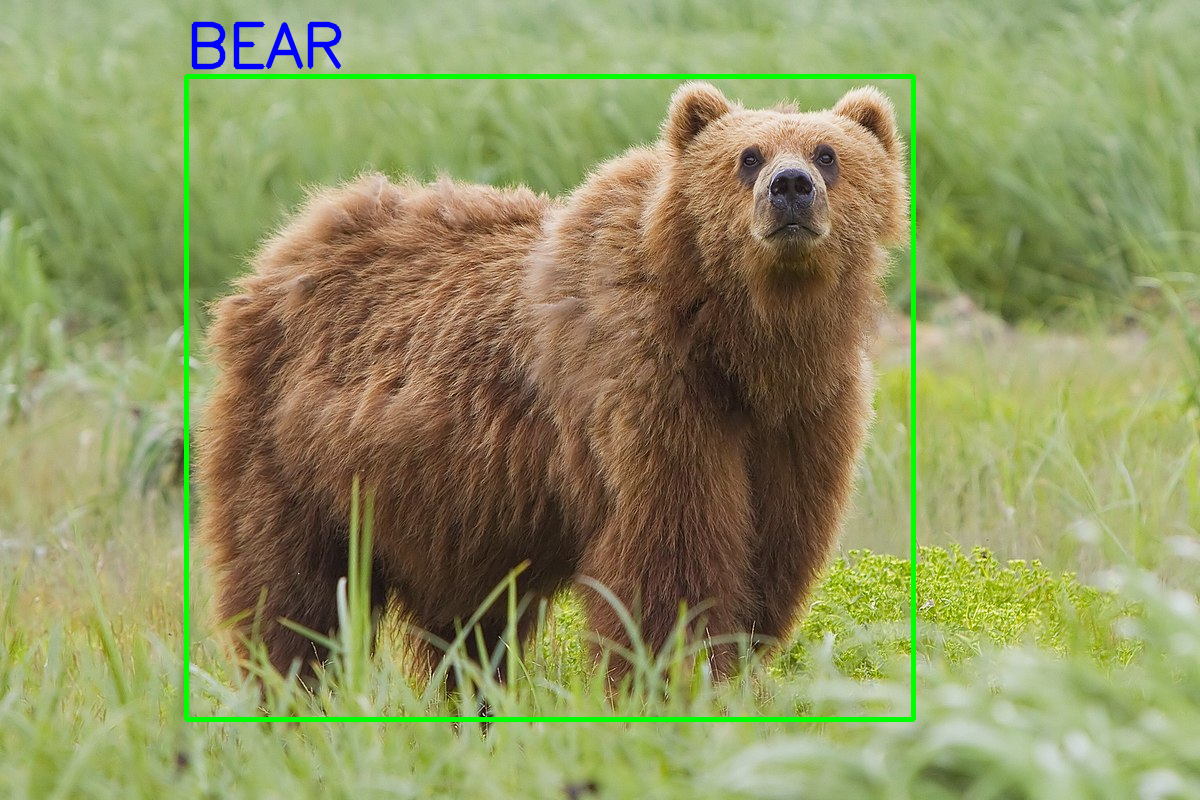

In [ ]:
detect_animals_in_image('/content/testing/image_testing/bear.jpg',model_path)


0: 384x640 2 bears, 1344.9ms
Speed: 5.1ms preprocess, 1344.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


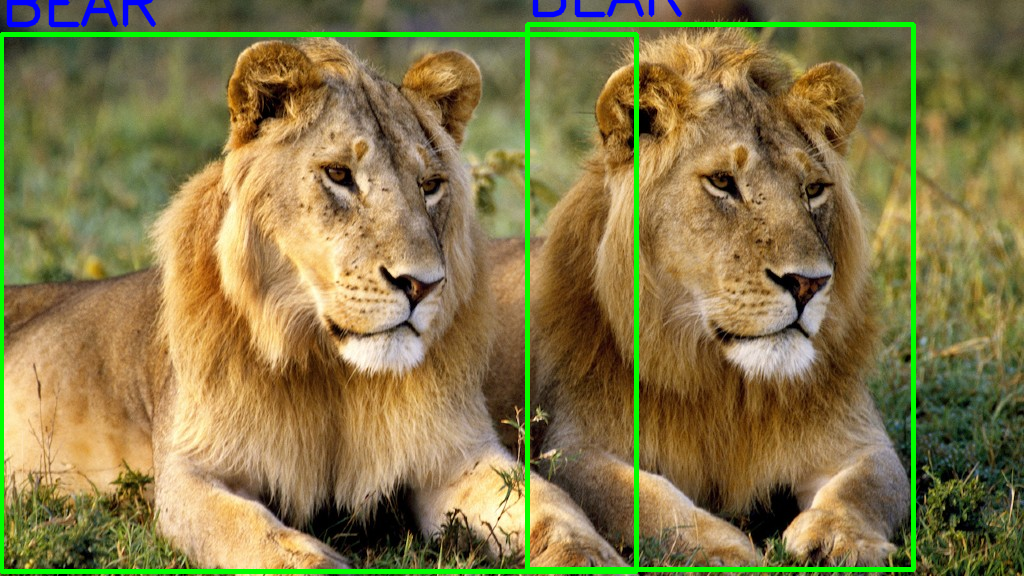

In [ ]:
detect_animals_in_image('/content/testing/image_testing/lion.jpg',model_path)

Detecting Animal in Video

In [ ]:
video_path = '/content/testing/video_testing/lion_zebra.mp4'
output_path = '/content/testing/video_testing/output/lion_zebra.mp4'

In [ ]:
detect_animals_in_video(video_path, model_path, output_path, threshold=0.5)


0: 384x640 1 cow, 2 zebras, 876.5ms
Speed: 2.1ms preprocess, 876.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cow, 2 zebras, 868.9ms
Speed: 3.4ms preprocess, 868.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cow, 2 zebras, 888.9ms
Speed: 2.1ms preprocess, 888.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 zebras, 873.8ms
Speed: 2.4ms preprocess, 873.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 horse, 2 zebras, 885.3ms
Speed: 1.9ms preprocess, 885.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 horse, 2 zebras, 856.2ms
Speed: 1.9ms preprocess, 856.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cow, 2 zebras, 863.6ms
Speed: 1.9ms preprocess, 863.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cow, 2 zebras, 865.1ms
Speed: 2.0ms preproce

In [ ]:
video_path = '/content/testing/video_testing/bear_horse.mp4'
output_path = '/content/testing/video_testing/output/output.mp4'

In [ ]:
detect_animals_in_video(video_path, model_path, output_path, threshold=0.5)


0: 384x640 1 car, 3 horses, 1476.5ms
Speed: 2.3ms preprocess, 1476.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 3 horses, 998.0ms
Speed: 2.1ms preprocess, 998.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 horses, 836.6ms
Speed: 3.5ms preprocess, 836.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 horses, 845.6ms
Speed: 2.0ms preprocess, 845.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 horses, 840.2ms
Speed: 3.1ms preprocess, 840.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 horses, 842.1ms
Speed: 2.5ms preprocess, 842.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 horses, 838.5ms
Speed: 5.4ms preprocess, 838.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 horses, 827.2ms
Speed: 3.1ms preprocess, 827.2ms inference, 1.1m

# MOOD CLASSIFICATION BASED ON AUDIO

To detect and classify mood into Queit/Sad, Normal and Angry, we will be using amplitude to find the mood of the an animal.

If amplitude is around 50% than the mood is Normal if it goes above some threshold lets say 80, the mood will be classified as Angry.
If below 30%, the mood is

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [8]:
def classify_mood_from_wave(wav_file, animal_name, angry_threshold=0.68, normal_threshold_low=0.40):
    try:
        # Read the audio file
        frequency_sampling, audio_signal = wavfile.read(wav_file)

        # Normalize the audio signal
        if audio_signal.dtype == np.int8:
          audio_signal = audio_signal / np.power(2, 7)
        elif audio_signal.dtype == np.int16:
          audio_signal = audio_signal / np.power(2, 15)
        elif audio_signal.dtype == np.int32:
          audio_signal = audio_signal / np.power(2, 31)
        elif audio_signal.dtype == np.uint8:
          audio_signal = audio_signal / 255.0
        elif audio_signal.dtype == np.float32:
          audio_signal = audio_signal * 2 - 1
        elif audio_signal.dtype == np.float64:
          audio_signal = audio_signal * 2 - 1

        # Calculate the maximum amplitude
        max_amplitude = np.max(np.abs(audio_signal))

        # Classify the mood based on the amplitude
        if max_amplitude >= angry_threshold:
            mood = "Angry/Irritated"
        elif normal_threshold_low <= max_amplitude < angry_threshold:
            mood = "Normal/Happy"
        else:
            mood = "Sad/Queit"

        # Print information about the audio signal and classification
        print(f'\nSignal shape: {audio_signal.shape}')
        print(f'Signal Datatype: {audio_signal.dtype}')
        print(f'Signal duration: {round(audio_signal.shape[0] / float(frequency_sampling), 2)} seconds')
        print(f"Maximum Amplitude: {max_amplitude:.2f}")
        print(f"Classified Mood of {animal_name}: {mood}")

        # Create a time axis in milliseconds for the modified audio signal
        time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

        # Plot the modified audio signal
        plt.figure(figsize=(12, 6))
        plt.plot(time_axis, audio_signal, color='blue')
        plt.xlabel('Time (milliseconds)')
        plt.ylabel('Amplitude')
        plt.title(f'Classified Mood of {animal_name}: {mood}')
        plt.show()

        return mood

    except Exception as e:
        print(f"Error processing {wav_file}: {str(e)}")
        return None


Signal shape: (200350,)
Signal Datatype: float64
Signal duration: 4.54 seconds
Maximum Amplitude: 0.69
Classified Mood of bear: Angry/Irritated


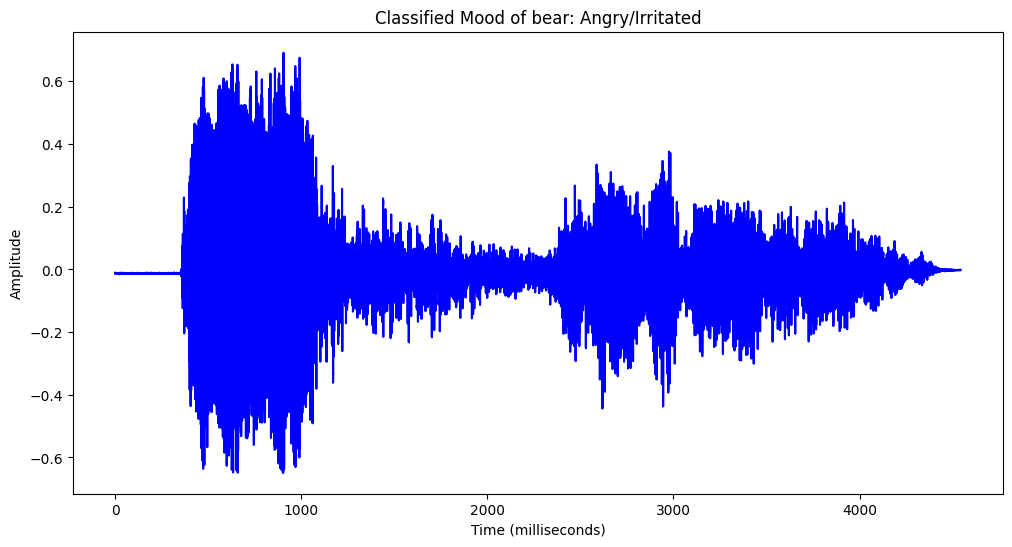

'Angry/Irritated'

In [ ]:
classify_mood_from_wave('/content/audio_files/bear/beargrowl.wav','bear')


Signal shape: (14421,)
Signal Datatype: float64
Signal duration: 1.3 seconds
Maximum Amplitude: 0.94
Classified Mood of zebra: Angry/Irritated


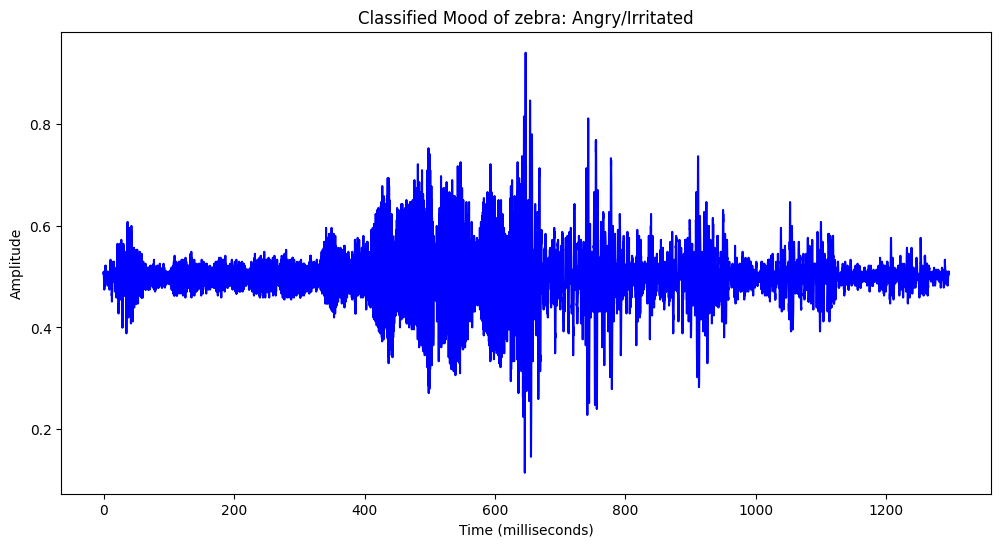

'Angry/Irritated'

In [ ]:
classify_mood_from_wave('/content/audio_files/zebra/zebra.wav','zebra')


Signal shape: (261120, 2)
Signal Datatype: float64
Signal duration: 5.92 seconds
Maximum Amplitude: 0.66
Classified Mood of zebra: Normal/Happy


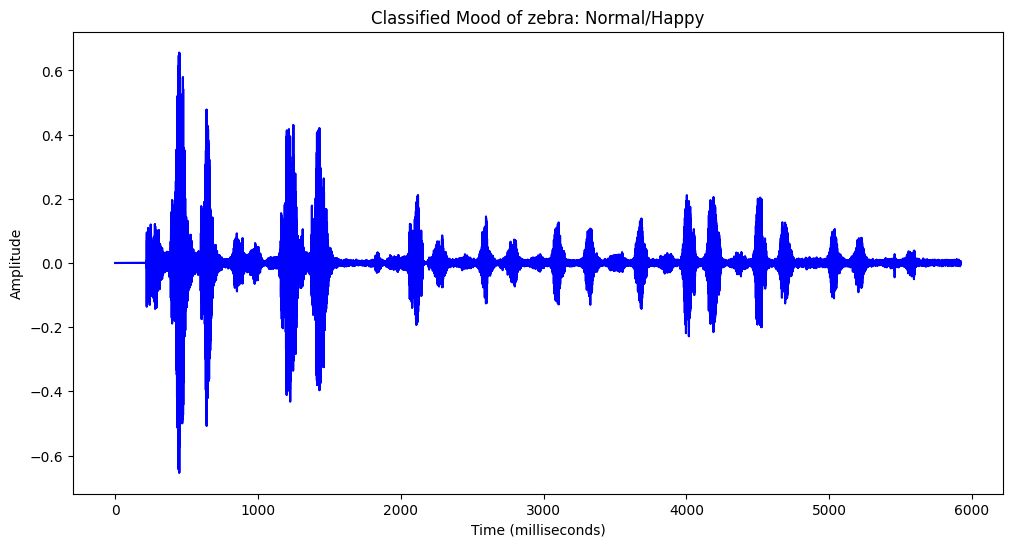

'Normal/Happy'

In [ ]:
classify_mood_from_wave('/content/audio_files/zebra/zebra_normal.wav','zebra')

# Graph-Based Movement Tracking

In [24]:
bear_area = {
    'Water-Source-1': ['Forest-1', 'Forest-2', 'Plain-1'],
    'Forest-1': ['Den', 'Water-Source-1'],
    'Forest-2': ['Plain-1', 'Plain-2', 'Water-Source-1'],
    'Water-Source-2': ['Den', 'Plain-2'],
    'Visitor-center': ['Den', 'Plain-2'],
    'Den': ['Forest-1', 'Plain-1', 'Water-Source-2', 'Visitor-center'],
    'Plain-1': ['Water-Source-1', 'Den', 'Forest-2'],
    'Plain-2': ['Water-Source-2', 'Visitor-center', 'Forest-2']
}


In [25]:
def get_appropriate_places(behavior):
    if behavior == 'thirsty':
        return ['Water-Source-1', 'Water-Source-2']
    elif behavior == 'hungry':
        return ['Forest-1', 'Forest-2']
    elif behavior == 'tired':
        return ['Den']
    elif behavior == 'exploring':
        return ['Visitor-center', 'Plain-1', 'Plain-2']
    else:
        return []


In [33]:
def bfs_shortest_path(graph,start,goal):
    if start == goal:
        return "That was easy! Start = goal"
    explored = []
    queue = [[start]]
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)

                if neighbour == goal:
                    return new_path

                explored.append(node)

    return "So sorry, but a connecting path doesn't exist :( "

In [36]:
def find_shortest_path_to_appropriate_place(graph, behavior, current_location):
    appropriate_places = get_appropriate_places(behavior)
    print(f"Appropriate places for bear (behavior: {behavior}): {appropriate_places}")

    if appropriate_places:
        shortest_path = None
        shortest_length = float('inf')

        for place in appropriate_places:
            path = bfs_shortest_path(graph, current_location, place)
            if path and len(path) < shortest_length:
                shortest_path = path
                shortest_length = len(path)

        if shortest_path:
            print(f"Bear is currently at {current_location} and its behaviour is {behavior} hence it will take the following path:\n {shortest_path}")
        else:
            print(f"No path found from {current_location} to any appropriate place.")
    else:
        print("Invalid behavior specified.")

In [40]:
behavior = 'thirsty'
current_location = 'Visitor-center'
find_shortest_path_to_appropriate_place(bear_area, behavior, current_location)

Appropriate places for bear (behavior: thirsty): ['Water-Source-1', 'Water-Source-2']
Bear is currently at Visitor-center and its behaviour is thirsty hence it will take the following path:
 ['Visitor-center', 'Den', 'Water-Source-2']
